In [2]:
%matplotlib inline

import brian2 as b2
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

import matplotlib.pyplot as plt

nr of spikes: 0


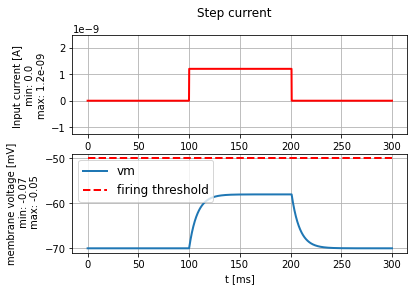

nr of spikes: 5


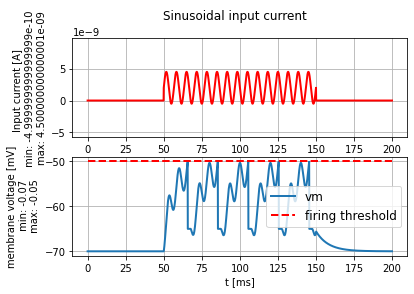

In [8]:
%matplotlib inline

LIF.getting_started()

In [4]:
LIF.print_default_parameters()

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [5]:
# See default values 
LIF.simulate_LIF_neuron.__defaults__

(5. * msecond,
 -70. * mvolt,
 -65. * mvolt,
 -50. * mvolt,
 10. * Mohm,
 8. * msecond,
 2. * msecond)

In [6]:
help(LIF.simulate_LIF_neuron)

Help on function simulate_LIF_neuron in module neurodynex3.leaky_integrate_and_fire.LIF:

simulate_LIF_neuron(input_current, simulation_time=5. * msecond, v_rest=-70. * mvolt, v_reset=-65. * mvolt, firing_threshold=-50. * mvolt, membrane_resistance=10. * Mohm, membrane_time_scale=8. * msecond, abs_refractory_period=2. * msecond)
    Basic leaky integrate and fire neuron implementation.
    
    Args:
        input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
        simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
        v_rest (Quantity): Resting potential: -70mV
        v_reset (Quantity): Reset voltage after spike - 65mV
        firing_threshold (Quantity) Voltage threshold for spiking -50mV
        membrane_resistance (Quantity): 10Mohm
        membrane_time_scale (Quantity): 8ms
        abs_refractory_period (Quantity): 2ms
    
    Returns:
        StateMonitor: Brian2 StateMonitor for the membrane v

# 1.1. Exercise: minimal current 
Calculate the minimum current needed for a spike 
Imin = (Vreset - Vrest)/R = (20/10)*e-06 mA

nr of spikes: 0


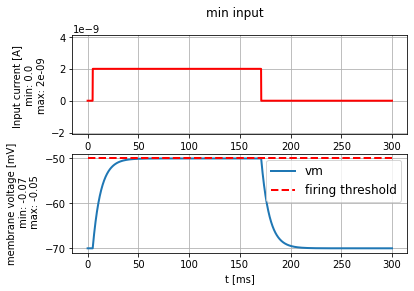

In [7]:
%matplotlib inline
# create a step current with amplitude = I_min
I_min = 2.0e-6*b2.mA
step_current = input_factory.get_step_current(
    t_start=5, t_end=170, unit_time=b2.ms,
    amplitude=I_min)

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 300 * b2.ms)

# plot I and vm - no spike expected
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

# 1.2. Exercise: f-I Curve
For a constant input current 𝐼, a LIF neuron fires regularly with firing frequency 𝑓. If the current is to small (𝐼<𝐼𝑚𝑖𝑛) 𝑓 is 0Hz; for larger 𝐼 the rate increases. A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

* Sketch the f-I curve you expect to see.
* What is the maximum rate at which this neuron can fire?
* Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current

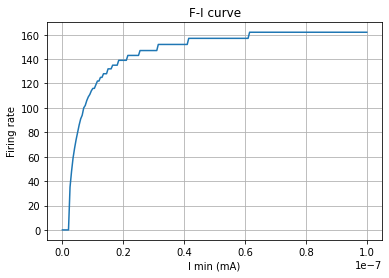

In [7]:
%matplotlib inline
# 2e-6 is the minimal current for the repetitive firing
Io = np.arange(0e-6, 100e-6, 0.5e-06) * b2.mA
t_ref = 3 * b2.ms
freq = list()
for io in Io:
    step_current = input_factory.get_step_current(
        t_start=0, t_end=500, unit_time=b2.ms,
        amplitude=io)  # set I_min to your value
    # Run the LIF model with t_ref  = 3 ms
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(
        input_current=step_current,
        simulation_time = 500 * b2.ms,
        abs_refractory_period=t_ref
    )
    freq.append(spike_monitor.count[0])

plt.plot(Io, freq)
plt.ylabel('Firing rate')
plt.xlabel('I min (mA)')
plt.title('F-I curve')
plt.grid()
plt.show()

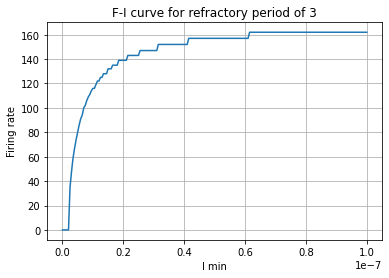

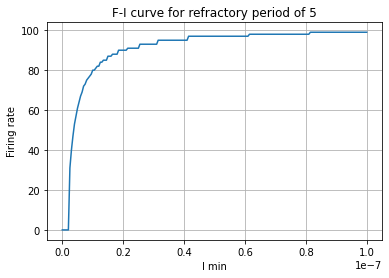

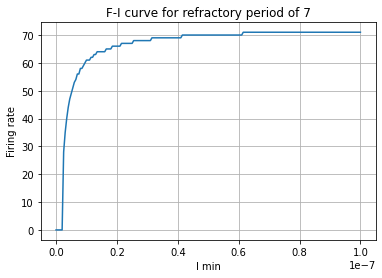

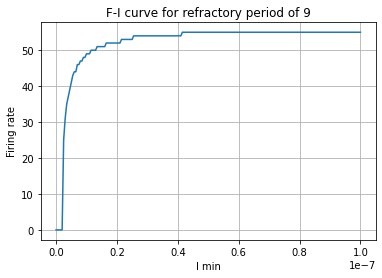

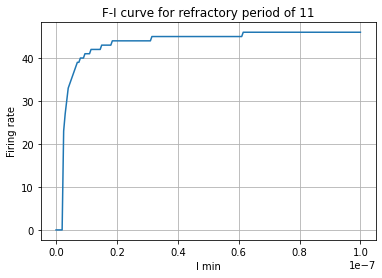

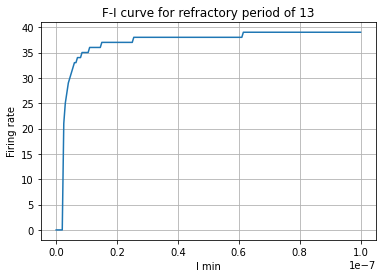

In [8]:
# how gain changes wrt different refactory periods  
Io = np.arange(0e-6, 100e-6, 0.5e-06)*b2.mA
t_ref = [3, 5, 7, 9, 11, 13]
for t_r in t_ref:
    freq = list()
    for io in Io:
        step_current = input_factory.get_step_current(
            t_start=0, t_end=500, unit_time=b2.ms,
            amplitude=io)  # set I_min to your value

        # run the LIF model.
        # Note: As we do not specify any model parameters, the simulation runs with the default values
        (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, \
                                        simulation_time = 500 * b2.ms, abs_refractory_period=t_r * b2.ms)
        freq.append(spike_monitor.count[0])

    plt.plot(Io, freq)
    plt.ylabel('Firing rate')
    plt.xlabel('I min')
    plt.title('F-I curve for refractory period of {}'.format(str(t_r)))
    plt.grid()
    plt.show()

# 1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron

A LIF neuron is determined by the following parameters: Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.

In [9]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=412)

(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 1.75e-08'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.07500000000000001\n max: -0.03473520635408989'>)

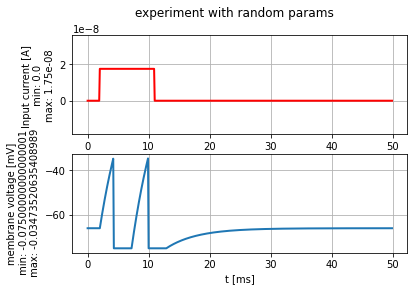

In [10]:
%matplotlib inline
# define your test current
test_current = input_factory.get_step_current(
    t_start=2, t_end=10, unit_time=b2.ms, amplitude= 17.5 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment with random params")

In [11]:
R = 4 # given by Imin = (Vth-Vrest)/R
Vreset = -76 
Vrest = -67 
Vth = -35 
t_ref = 3 
t_m = 4 

In [12]:
# Check the parameters to compare with the estimates
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.066
Reset voltage: -0.07500000000000001
Firing threshold: -0.034
Membrane resistance: 5000000.0
Membrane time-scale: 0.005
Absolute refractory period: 0.003


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 1.75e-08'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.076\n max: -0.03526164094747359'>)

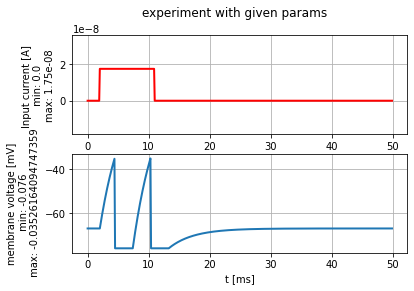

In [13]:
%matplotlib inline
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=test_current, simulation_time = 50 * b2.ms, \
                                                       abs_refractory_period=t_ref * b2.ms, firing_threshold = Vth * b2.mV, \
                                                       membrane_resistance = R * b2.Mohm, membrane_time_scale= t_m * b2.ms, \
                                                       v_rest = Vrest * b2.mV, v_reset = Vreset * b2.mV)
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment with given params")


# 1.4. Exercise: Sinusoidal input current and subthreshold response

In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

nr of spikes: 0


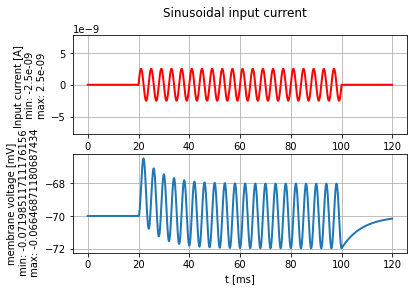

In [14]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [15]:
import numpy as np 

def get_phase_difference(signal_a, signal_b):
    norm_a = np.linalg.norm(signal_a)
    norm_b = np.linalg.norm(signal_b)
    phi = np.arccos( np.dot(signal_a, signal_b) / (norm_a * norm_b * 1e12) )
    return norm_a, norm_b, phi

In [17]:
min_time = 50*b2.ms
max_time = 70*b2.ms
idx_recorded = (state_monitor[0].t>=min_time) & (state_monitor[0].t<=max_time)
out_signal = state_monitor[0].v[idx_recorded]
t_recorded = state_monitor[0].t[idx_recorded]
in_signal = sinusoidal_current(t_recorded,0)


norm_in, norm_out, d_phase = get_phase_difference(np.array(in_signal), np.array(out_signal))

print("Input Signal \n ========= \n Amplitude: {} mV".format(norm_in))

print("Output Signal \n ========= \n Amplitude: {} mV".format(norm_out))

print("Phase difference: {} radian".format(d_phase))

Input Signal 
 Amplitude: 2.5e-08 mV
Output Signal 
 Amplitude: 0.9922383124332583 mV
Phase difference: 1.5707963267948966 radian


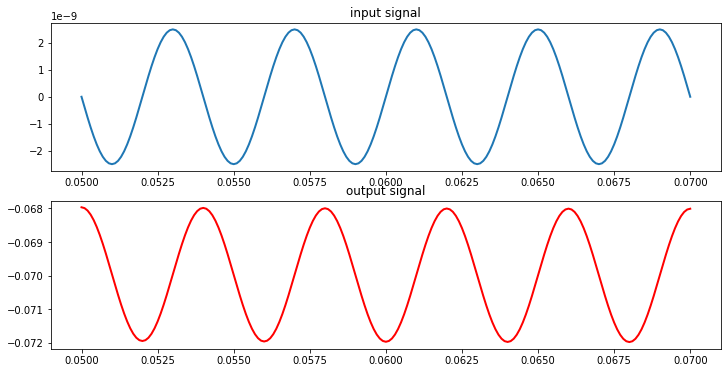

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
ax1.plot(t_recorded, in_signal, linewidth = 2)
ax1.set_title('input signal')
ax2.plot(t_recorded, out_signal, linewidth = 2, color = 'red')
ax2.set_title('output signal')
plt.show()

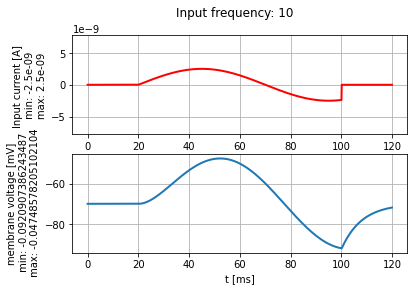

nr of spikes: 0


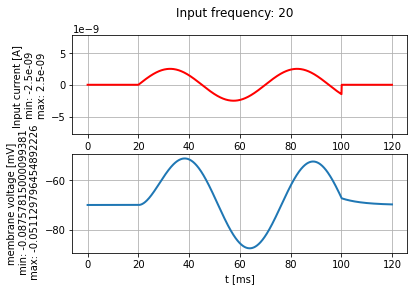

nr of spikes: 0


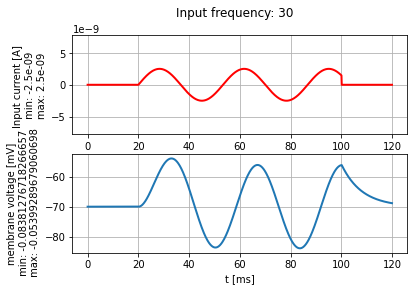

nr of spikes: 0


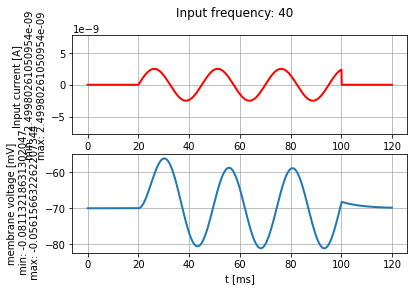

nr of spikes: 0


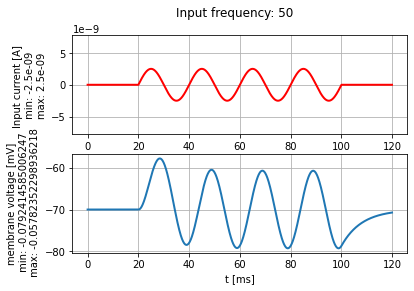

nr of spikes: 0


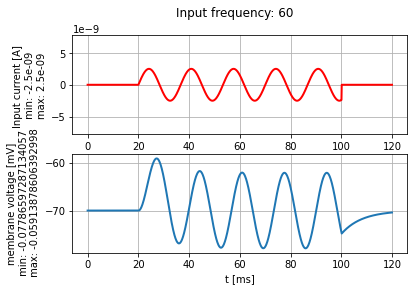

nr of spikes: 0


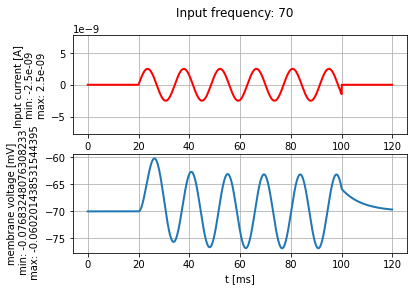

nr of spikes: 0


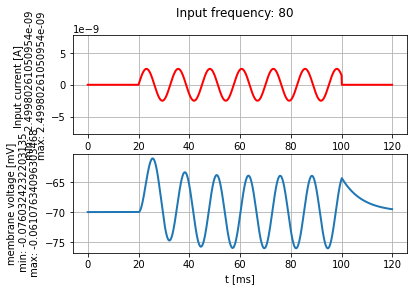

nr of spikes: 0


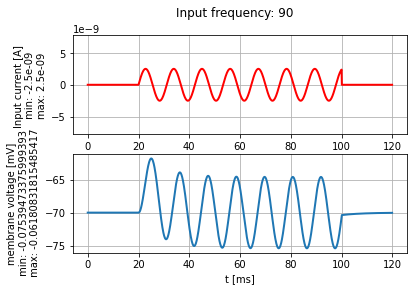

nr of spikes: 0


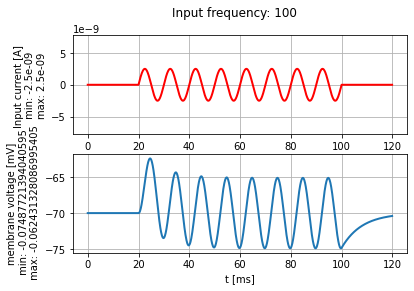

nr of spikes: 0


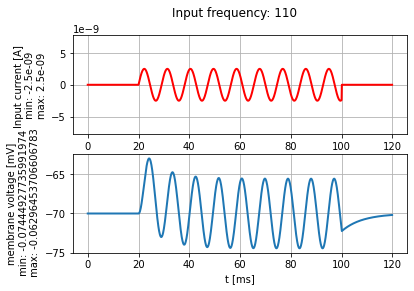

nr of spikes: 0


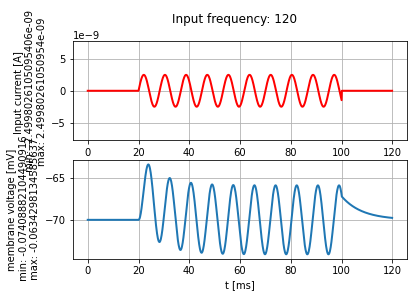

nr of spikes: 0


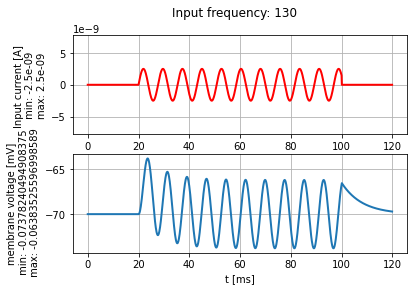

nr of spikes: 0


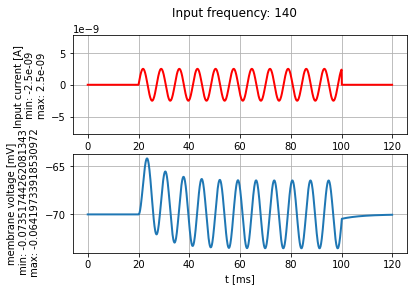

nr of spikes: 0


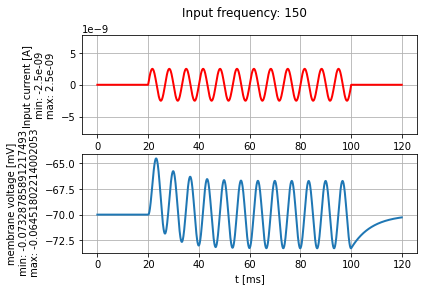

nr of spikes: 0


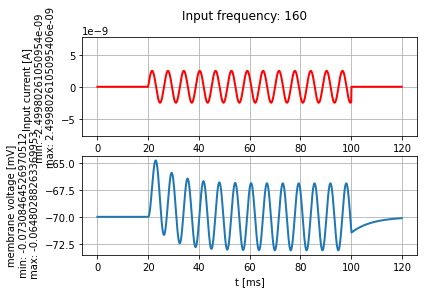

nr of spikes: 0


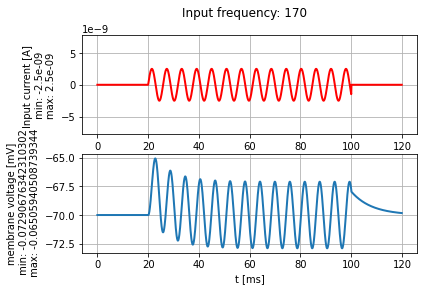

nr of spikes: 0


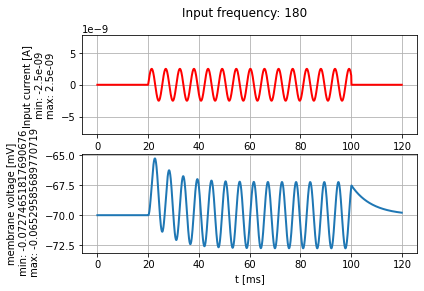

nr of spikes: 0


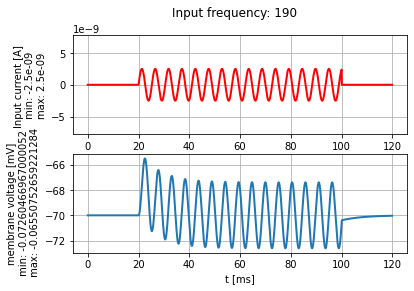

nr of spikes: 0


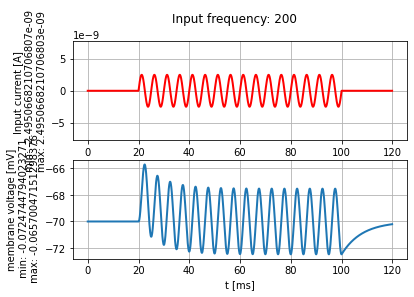

nr of spikes: 0


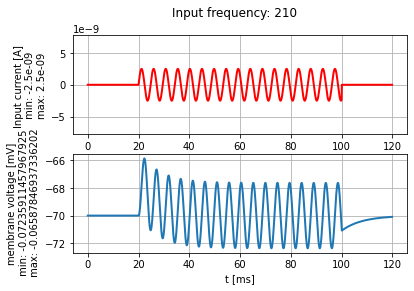

nr of spikes: 0


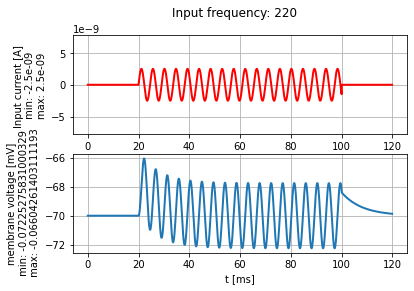

nr of spikes: 0


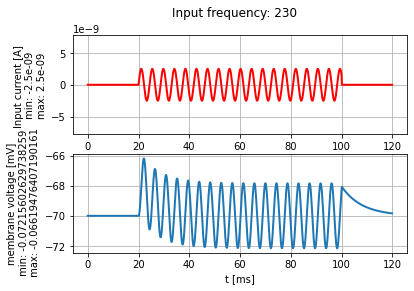

nr of spikes: 0


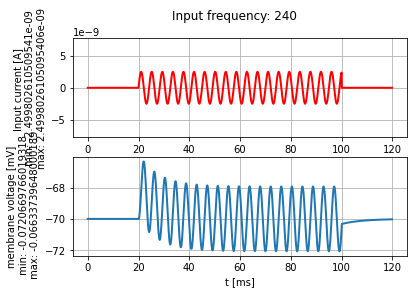

nr of spikes: 0


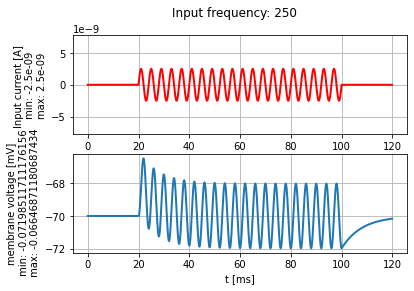

nr of spikes: 0


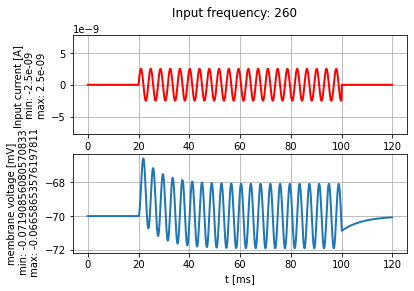

nr of spikes: 0


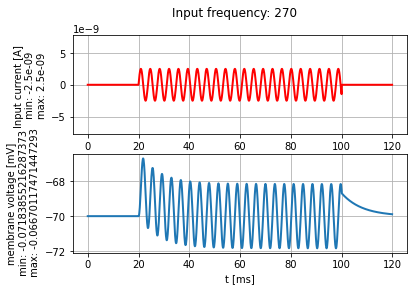

nr of spikes: 0


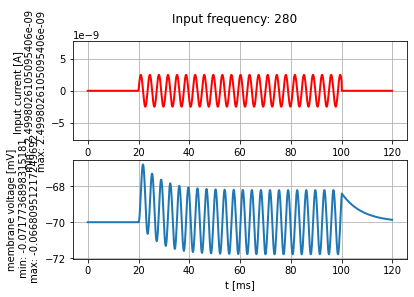

nr of spikes: 0


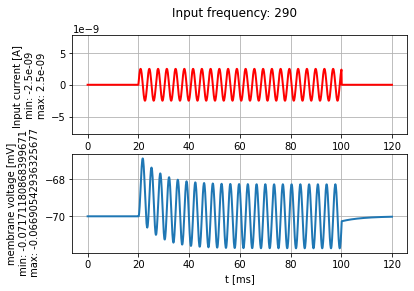

nr of spikes: 0


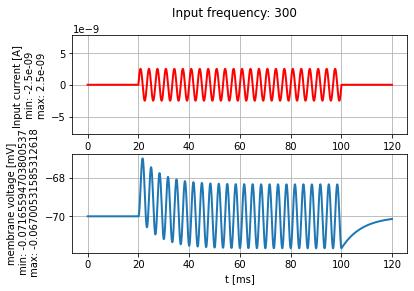

nr of spikes: 0


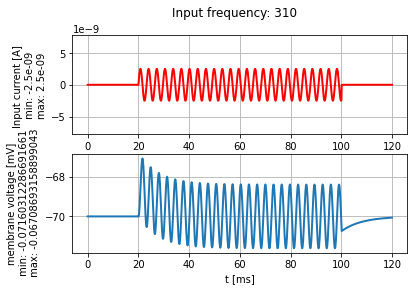

nr of spikes: 0


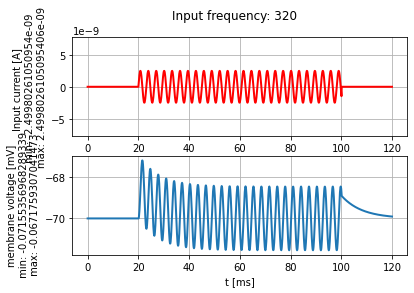

nr of spikes: 0


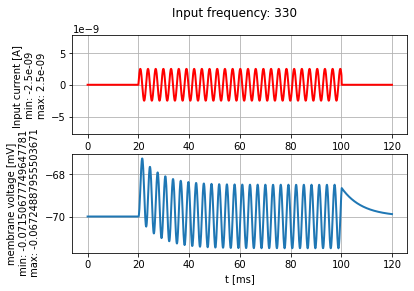

nr of spikes: 0


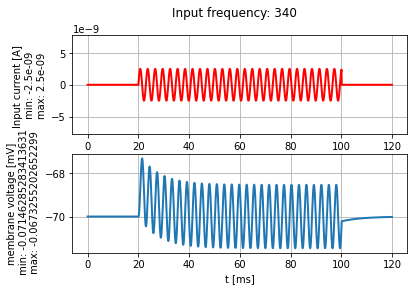

nr of spikes: 0


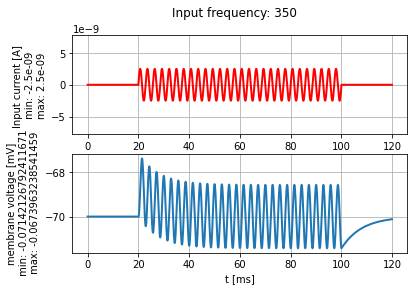

nr of spikes: 0


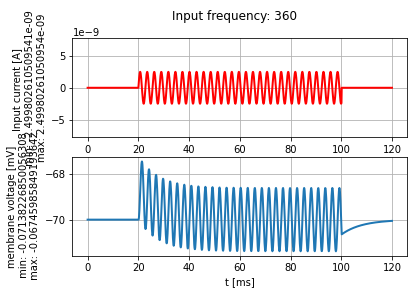

nr of spikes: 0


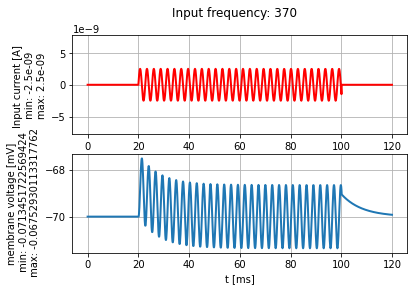

nr of spikes: 0


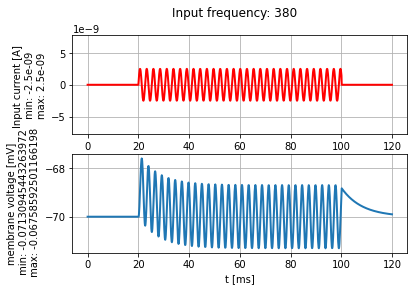

nr of spikes: 0


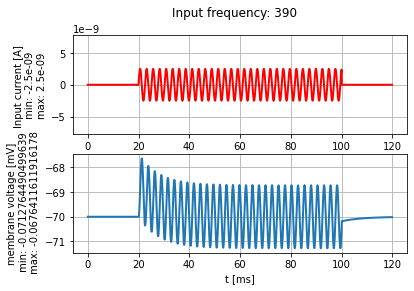

nr of spikes: 0


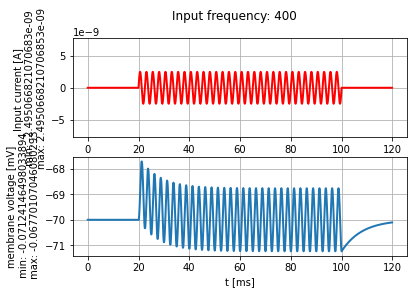

nr of spikes: 0


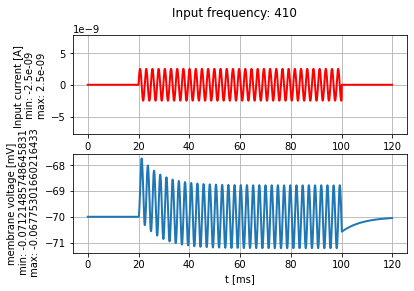

nr of spikes: 0


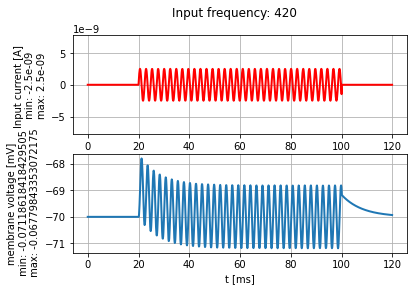

nr of spikes: 0


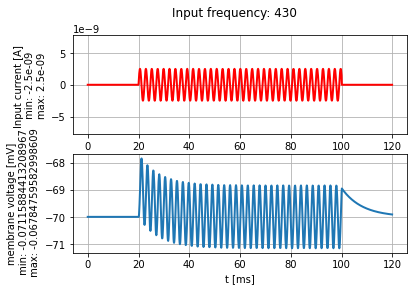

nr of spikes: 0


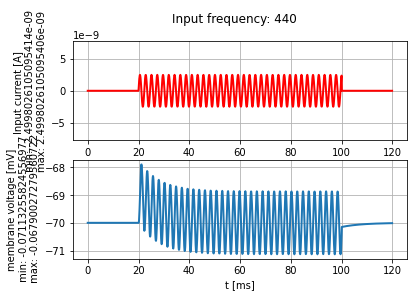

nr of spikes: 0


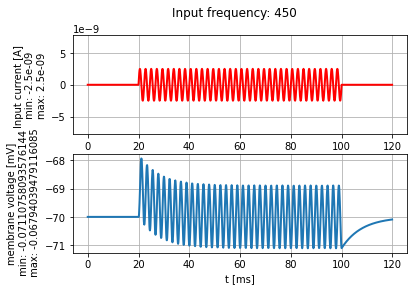

nr of spikes: 0


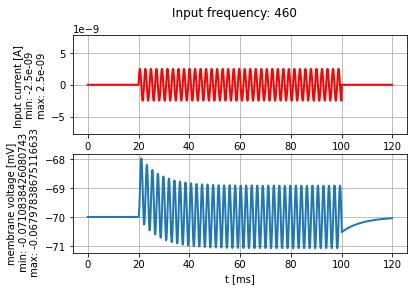

nr of spikes: 0


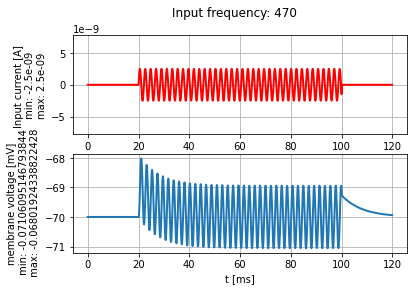

nr of spikes: 0


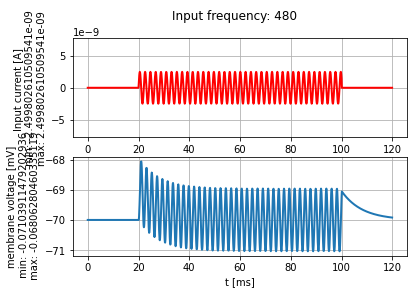

nr of spikes: 0


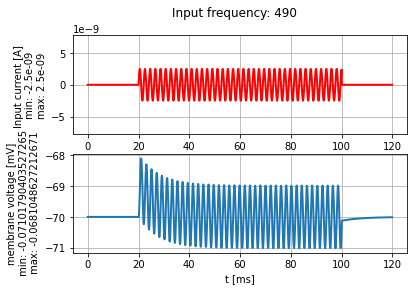

nr of spikes: 0


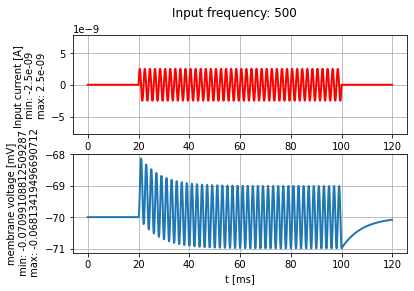

nr of spikes: 0


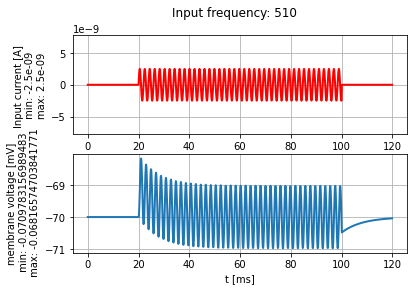

nr of spikes: 0


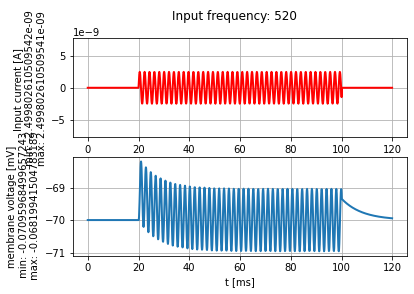

nr of spikes: 0


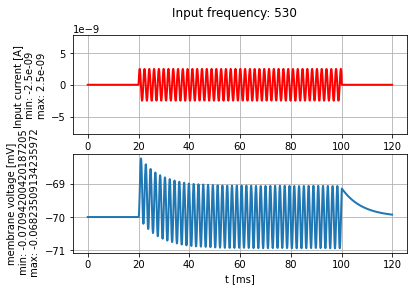

nr of spikes: 0


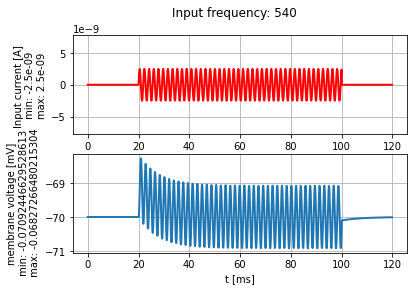

nr of spikes: 0


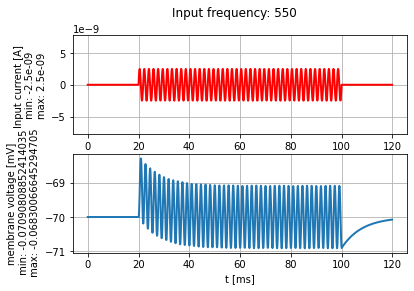

nr of spikes: 0


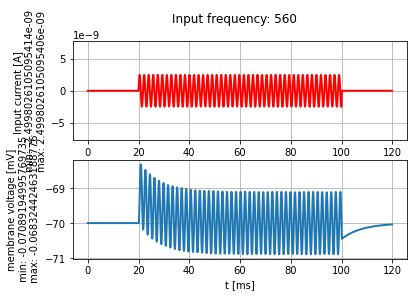

nr of spikes: 0


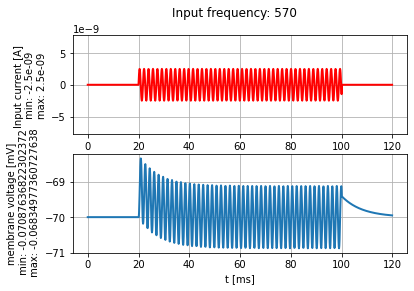

nr of spikes: 0


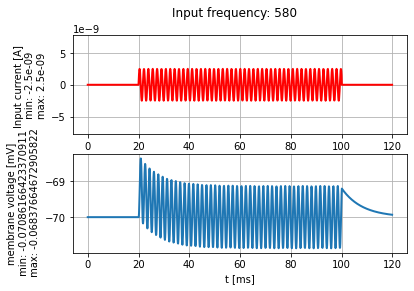

nr of spikes: 0


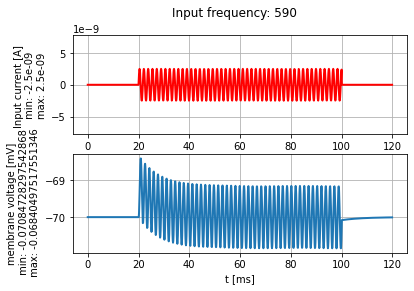

nr of spikes: 0


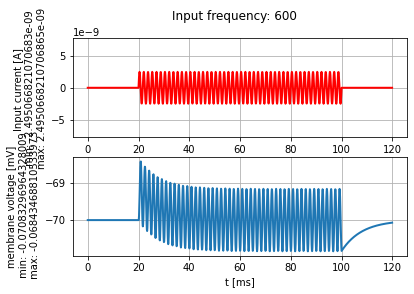

nr of spikes: 0


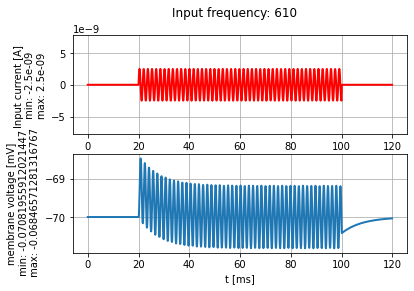

nr of spikes: 0


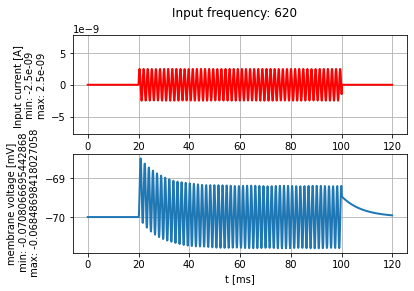

nr of spikes: 0


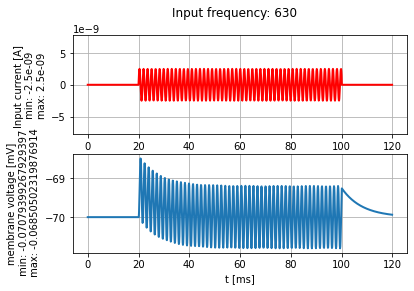

nr of spikes: 0


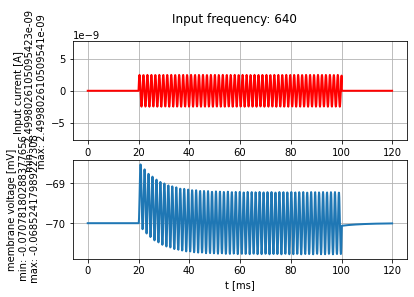

nr of spikes: 0


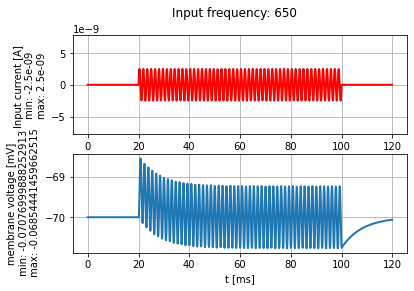

nr of spikes: 0


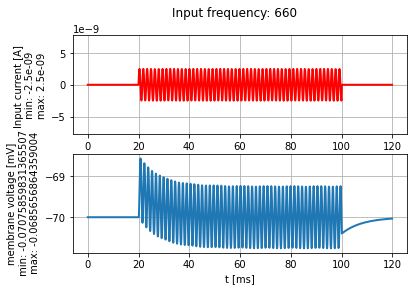

nr of spikes: 0


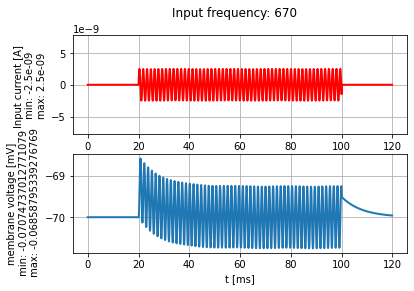

nr of spikes: 0


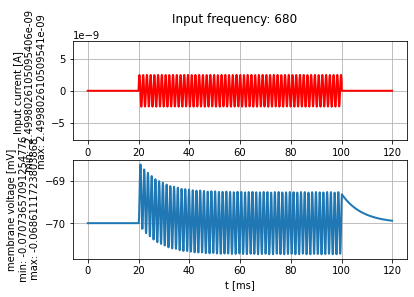

nr of spikes: 0


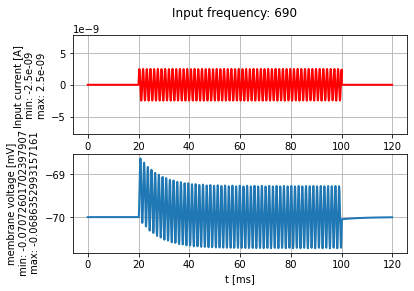

nr of spikes: 0


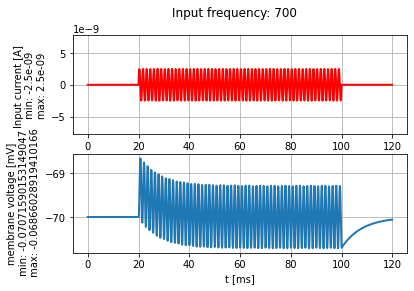

nr of spikes: 0


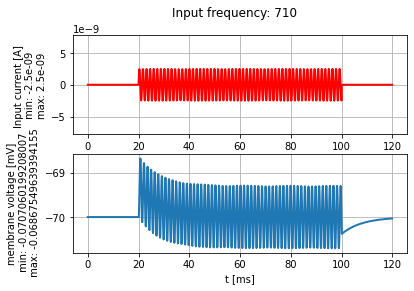

nr of spikes: 0


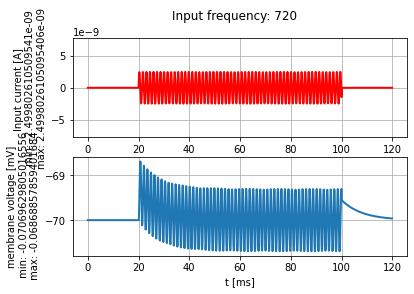

nr of spikes: 0


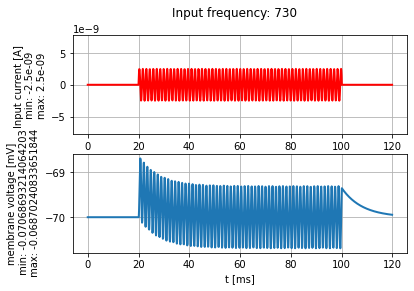

nr of spikes: 0


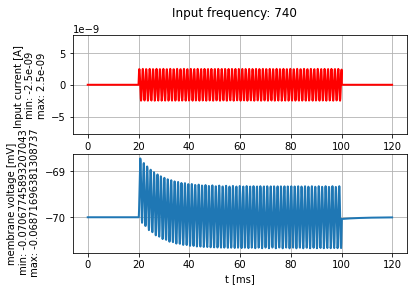

nr of spikes: 0


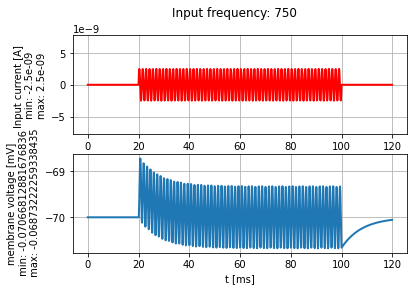

nr of spikes: 0


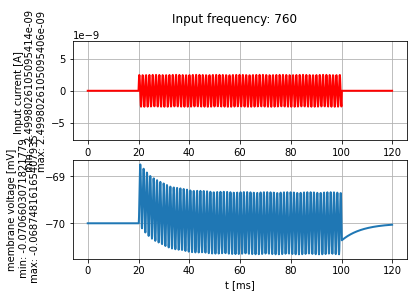

nr of spikes: 0


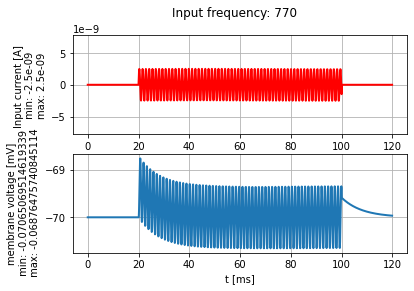

nr of spikes: 0


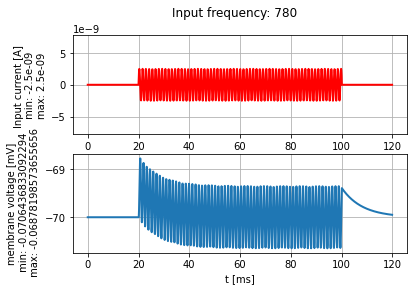

nr of spikes: 0


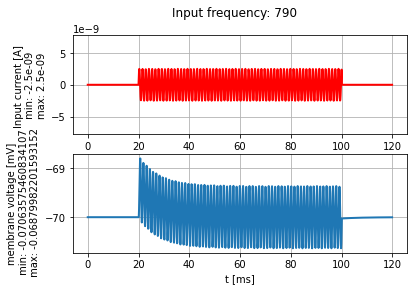

nr of spikes: 0


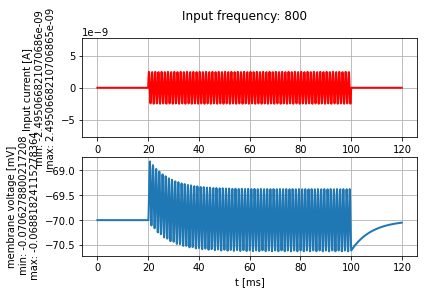

nr of spikes: 0


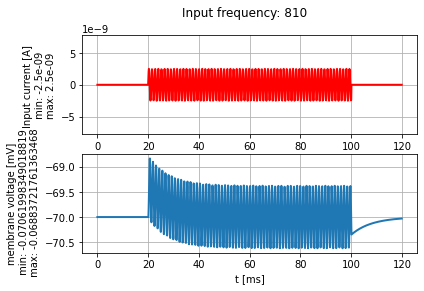

nr of spikes: 0


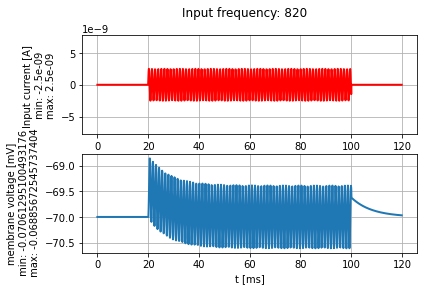

nr of spikes: 0


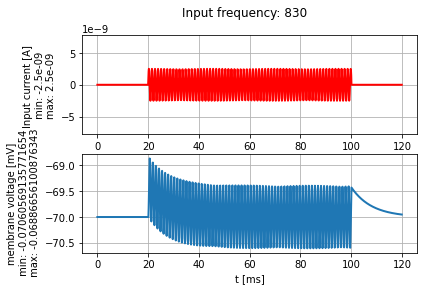

nr of spikes: 0


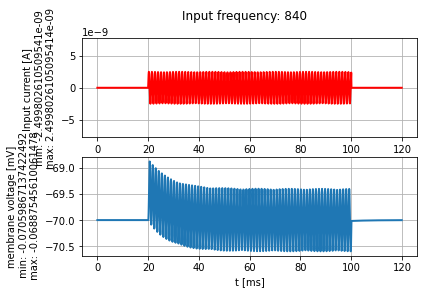

nr of spikes: 0


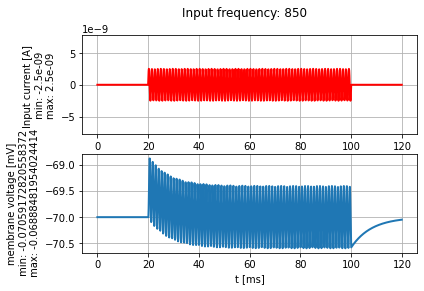

nr of spikes: 0


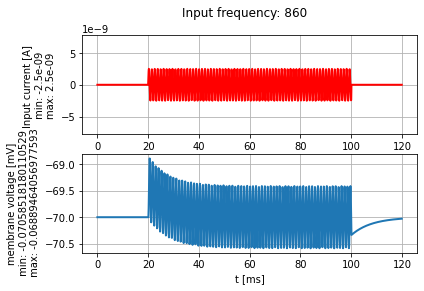

nr of spikes: 0


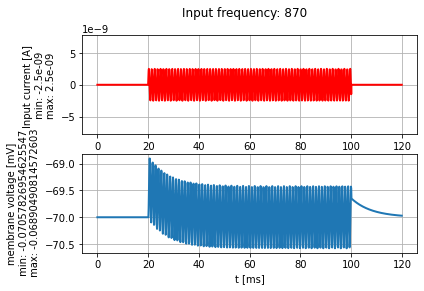

nr of spikes: 0


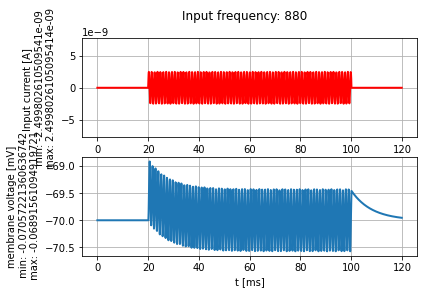

nr of spikes: 0


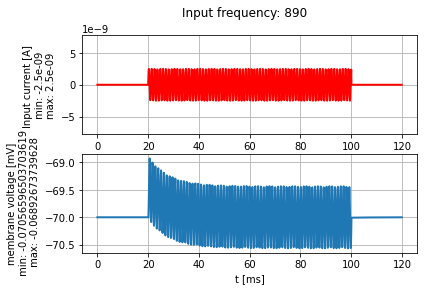

nr of spikes: 0


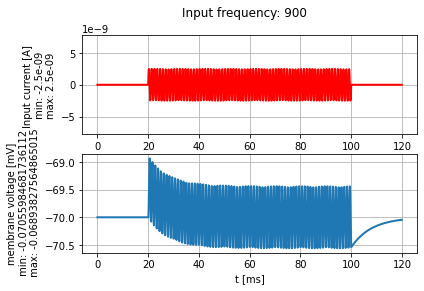

nr of spikes: 0


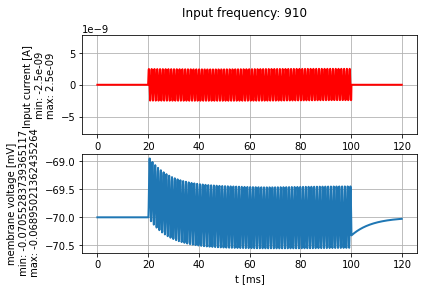

nr of spikes: 0


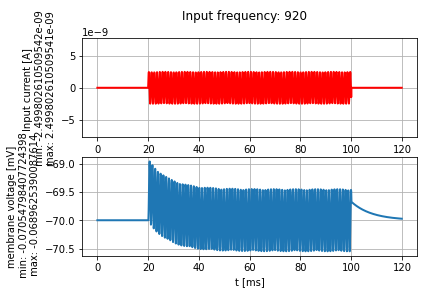

nr of spikes: 0


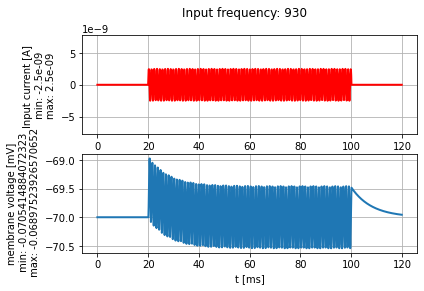

nr of spikes: 0


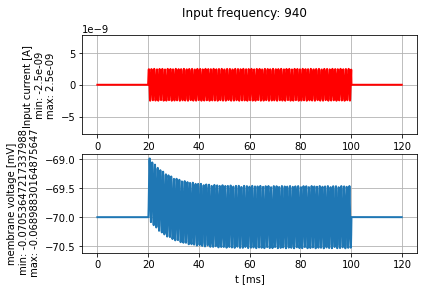

nr of spikes: 0


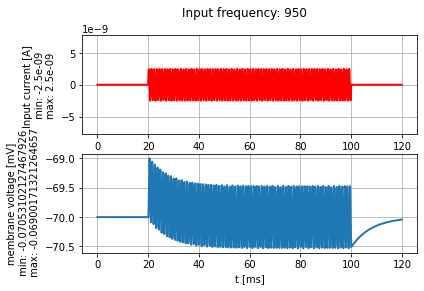

nr of spikes: 0


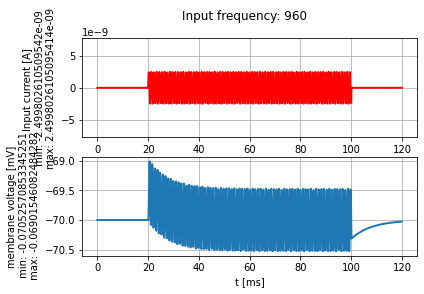

nr of spikes: 0


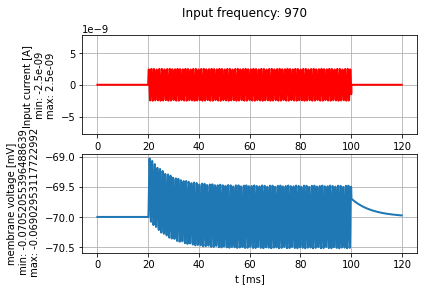

nr of spikes: 0


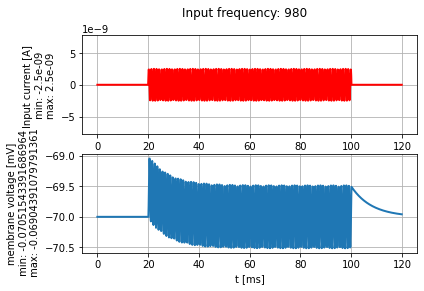

nr of spikes: 0


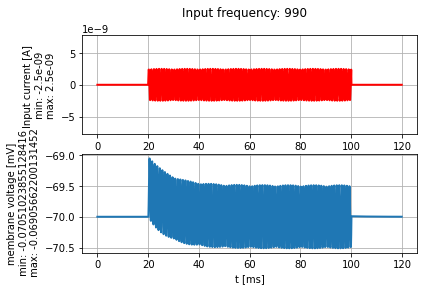

nr of spikes: 0


In [20]:
%matplotlib inline
F_in = np.arange(10, 1000, 10)
phase_shift = []
input_freq = [] 

for f_in in F_in:
    # note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                                amplitude= 2.5 * b2.namp, frequency=f_in * b2.Hz,
                                                direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    # get the phase shift
    out_signal = state_monitor[0].v[idx_recorded]
    in_signal = sinusoidal_current(t_recorded,0)
    _, _, d_phase = get_phase_difference(np.array(in_signal), np.array(out_signal))
    phase_shift.append(d_phase)
    input_freq.append(f_in)
    
    # plot the membrane voltage
    plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title='Input frequency: {}'.format(f_in))
    plt.show()
    print("nr of spikes: {}".format(spike_monitor.count[0]))

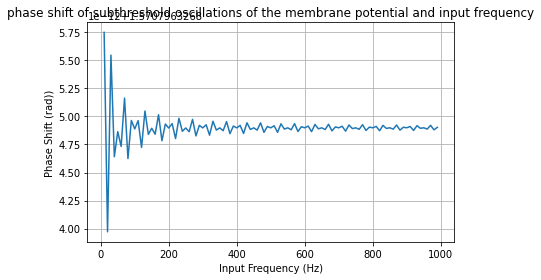

In [25]:
plt.plot(input_freq,phase_shift)
plt.xlabel('Input Frequency (Hz)')
plt.ylabel('Phase Shift (rad))')
plt.title('phase shift of subthreshold oscillations of the membrane potential and input frequency')
plt.grid()
plt.tight_layout()
plt.show()

This is a high-pass filter